In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [85]:
import emoji
from collections import Counter

In [4]:
df= pd.read_csv(r'C:\Users\saksh\JupyterFolder\youtube-case-study\Dataset\UScomments.csv',error_bad_lines=False)

C:\Users\saksh\AppData\Local\Temp\ipykernel_6332\127668749.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df= pd.read_csv(r'C:\Users\saksh\JupyterFolder\youtube-case-study\Dataset\UScomments.csv',error_bad_lines=False)
Skipping line 41589: expected 4 fields, saw 11
Skipping line 51628: expected 4 fields, saw 7
Skipping line 114465: expected 4 fields, saw 5

Skipping line 142496: expected 4 fields, saw 8
Skipping line 189732: expected 4 fields, saw 6
Skipping line 245218: expected 4 fields, saw 7

Skipping line 388430: expected 4 fields, saw 5

C:\Users\saksh\AppData\Local\Temp\ipykernel_6332\127668749.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv(r'C:\Users\saksh\JupyterFolder\youtube-case-study\Dataset\UScomments.csv',error_bad_lines=False)


In [5]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691400 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691400 non-null  object
 1   comment_text  691375 non-null  object
 2   likes         691400 non-null  object
 3   replies       691400 non-null  object
dtypes: object(4)
memory usage: 21.1+ MB


In [7]:
df.describe()

,video_id,comment_text,likes,replies
count,691400,691375,691400,691400
unique,2266,434076,1284,479
top,XpVt6Z1Gjjo,Lol,0,0
freq,800,310,456894,525730


In [8]:
df.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

## Sentiment Analysis

Add a polarity column to check the behaviour of each comment. Range: [-1,1] where -1 is negative, 1 is positive and 0 is neutral

In [11]:
polarity =[] #initialize an empty list

for comment in df["comment_text"]:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [12]:
df["polarity"]=polarity

In [13]:
df.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


## Wordcloud Analysis

In [71]:
stopwords=set(STOPWORDS)

###### WordCloud for positive comments 

In [51]:
filter1 = df['polarity'] == 1

In [52]:
pos_df = df[filter1]

In [53]:
type(filter1)

pandas.core.series.Series

In [54]:
pos_df.head()

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [55]:
#converting the comment_text column values to string
pos_comments = " ".join(pos_df['comment_text']) 

In [319]:
type(pos_comments)

str

In [166]:
#creating a wordcloud for positive comments
wordcloud_pos = WordCloud(stopwords=stopwords,colormap="autumn").generate(pos_comments)

(-0.5, 399.5, 199.5, -0.5)

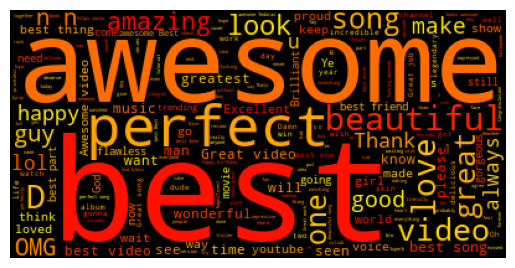

In [167]:
#plotting wordcloud
plt.imshow(wordcloud_pos)
plt.axis('off')

###### WordCloud for Negative comments

In [72]:
filter2 = df['polarity'] == -1

In [73]:
neg_df = df[filter2]

In [74]:
neg_df.head()

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0


In [80]:
#converting the comment_text column values to string
neg_comments = ' '.join(neg_df['comment_text'])

In [81]:
#creating a wordcloud for positive comments
wordcloud_neg = WordCloud(stopwords=stopwords).generate(neg_comments)

(-0.5, 399.5, 199.5, -0.5)

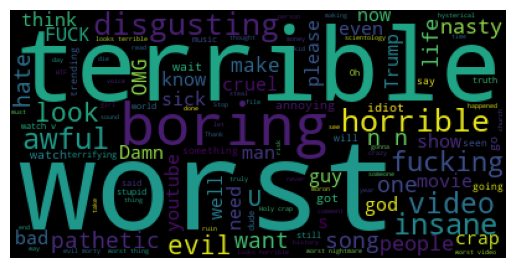

In [82]:
#plotting wordcloud
plt.imshow(wordcloud_neg)
plt.axis('off')

### Emoji Analysis

In [90]:
# creating a list of emojis from the comment_text using list comprehension
emoji_list = [char for comment in df['comment_text'].dropna() for char in comment if char in emoji.EMOJI_DATA]

In [93]:
emoji_list[0:15]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋', '💙', '👍', '👈', '😂', '🔥']

In [103]:
top10_emoji_count = Counter(emoji_list).most_common(10) #Top 10 most widely used emojis

In [108]:
top10_emoji_count

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

In [117]:
top10_emoji_count[2][0]

'❤'

In [126]:
#without list comprehension
test=[]
for i in range(10):
    test.append(top10_emoji_count[i][0])
test

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [132]:
emojis = [top10_emoji_count[i][0] for i in range(10)]
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [133]:
count = [top10_emoji_count[i][1] for i in range(10)]
count

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [ ]:
#using plot graph objects
import plotly.graph_objs as go
from plotly.offline import iplot
trace=go.Bar(x=emojis, y=count)
iplot([trace])

In [136]:
import plotly.express as px

In [159]:
#using plotly express
fig = px.bar(x= emojis, y = countcdf)
fig.update_traces(marker_color="crimson")
fig.update_layout(
    title="Top 10 emojis",
    xaxis_title="Emoji",
    yaxis_title="Frequency",
    font_size=15,
    plot_bgcolor= 'white')
fig.show()

## Most Liked Category

youtube_all_regions data file includes content from CA, DE, FR, GB, IN, JP, KR, MX, RU, and the US region.

In [215]:
full_df = pd.read_csv(r'C:\Users\saksh\JupyterFolder\youtube-case-study\Dataset\youtube_all_regions.csv', error_bad_lines=False)

C:\Users\saksh\AppData\Local\Temp\ipykernel_6332\3805006004.py:1: FutureWarning:

The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.





Refer the process of creating youtube_all_regions.csv file in "concatenate-multiple-csv-into-one" notebook.

In [216]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00+00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14+00:00,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


In [217]:
full_df['category_id'].sort_values().unique()

array([ 1,  2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 43,
       44], dtype=int64)

In [218]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339525 entries, 0 to 339524
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                339525 non-null  object
 1   trending_date           339525 non-null  object
 2   title                   339525 non-null  object
 3   channel_title           339525 non-null  object
 4   category_id             339525 non-null  int64 
 5   publish_time            339525 non-null  object
 6   tags                    339525 non-null  object
 7   views                   339525 non-null  int64 
 8   likes                   339525 non-null  int64 
 9   dislikes                339525 non-null  int64 
 10  comment_count           339525 non-null  int64 
 11  thumbnail_link          339525 non-null  object
 12  comments_disabled       339525 non-null  bool  
 13  ratings_disabled        339525 non-null  bool  
 14  video_error_or_removed  339525 non-n

###### To analyse the most liked category on youtube, category name is required which is not a part of the above data file, instead we can use category_id. Additional Data folder in Dataset contains JSON files, linking the category_id with their name.

In [219]:
json_file = pd.read_json(r'C:\Users\saksh\JupyterFolder\youtube-case-study\Dataset\additional_data/IN_category_id.json')

In [220]:
json_file.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
1,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
2,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
3,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."
4,youtube#videoCategoryListResponse,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""XI..."


In [221]:
json_file['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

###### Each entry in the items column is a dictionary. Here id = category_id and title = category name

In [222]:
category_dict = {} # initializing an empty dictionary
for item in json_file['items'].values:
    category_dict[int(item['id'])]=item['snippet']['title'] 

In [223]:
category_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [225]:
full_df['category_name'] = full_df['category_id'].map(category_dict)

In [226]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00+00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14+00:00,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music


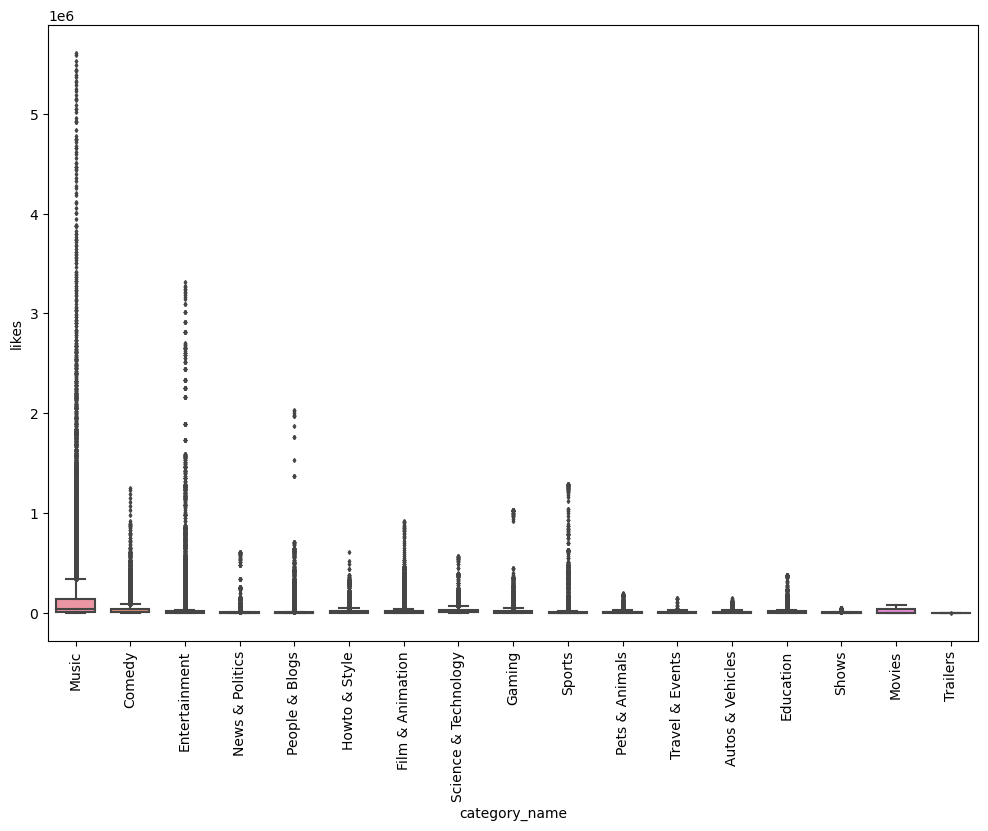

In [267]:
plt.figure(figsize=(12,8))
sns.boxplot(data=full_df,x='category_name',y='likes', width = 0.7, fliersize= 2)
plt.xticks(rotation = 'vertical')
plt.show()

## Audience Engagement 

To analyse the audience engagment, properties like 'like rate', 'dislike rate' and 'comment rate' needs to be compared across all the categories

In [258]:
full_df['likes_rate']=full_df['likes']/full_df['views']*100
full_df['dislikes_rate']=full_df['dislikes']/full_df['views']*100
full_df['comment_count_rate']=full_df['comment_count']/full_df['views']*100

In [259]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'likes_rate', 'dislikes_rate', 'comment_count_rate'],
      dtype='object')

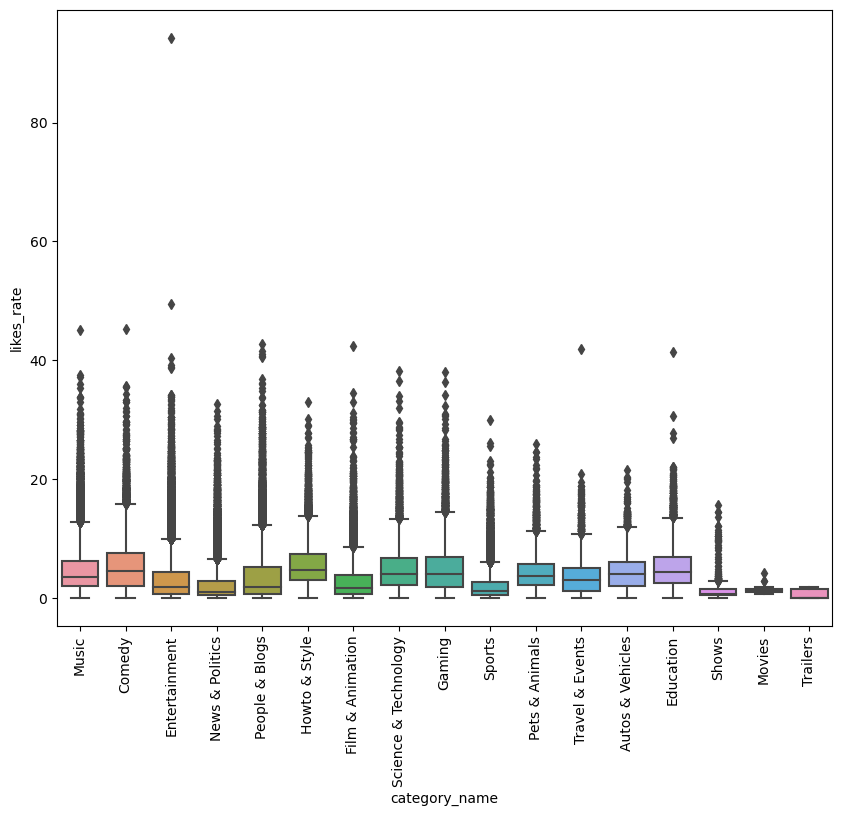

In [266]:
plt.figure(figsize=(10,8))
sns.boxplot(data=full_df,x='category_name',y='likes_rate')
plt.xticks(rotation = 'vertical')
plt.show()

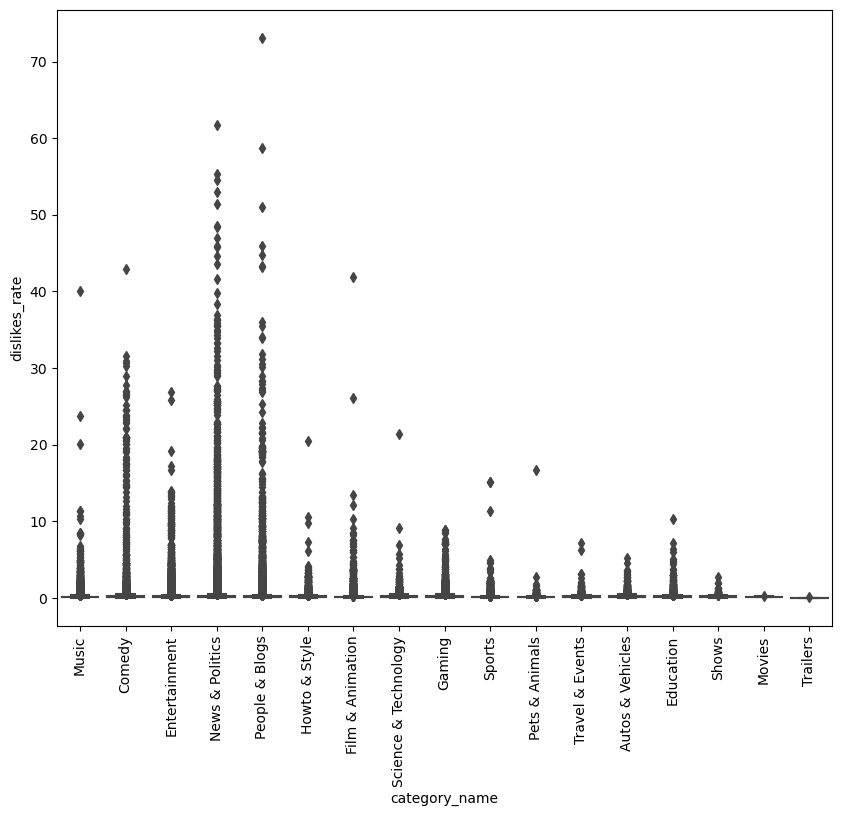

In [268]:
plt.figure(figsize=(10,8))
sns.boxplot(data=full_df,x='category_name',y='dislikes_rate')
plt.xticks(rotation = 'vertical')
plt.show()

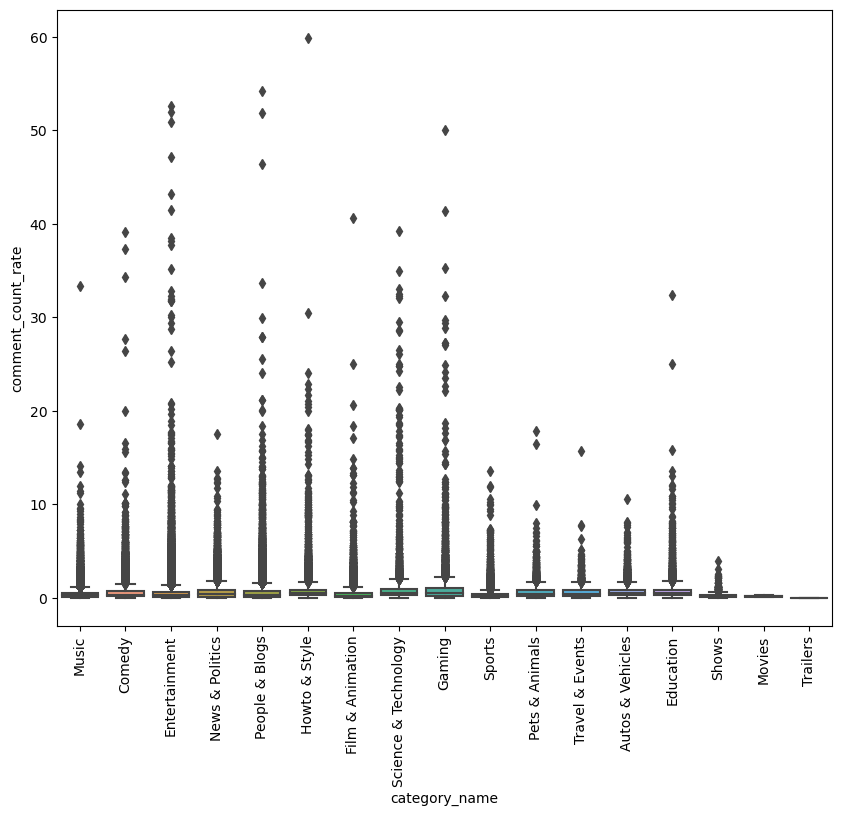

In [269]:
plt.figure(figsize=(10,8))
sns.boxplot(data=full_df,x='category_name',y='comment_count_rate')
plt.xticks(rotation = 'vertical')
plt.show()

##### Correlation between views and likes

<Axes: xlabel='views', ylabel='likes'>

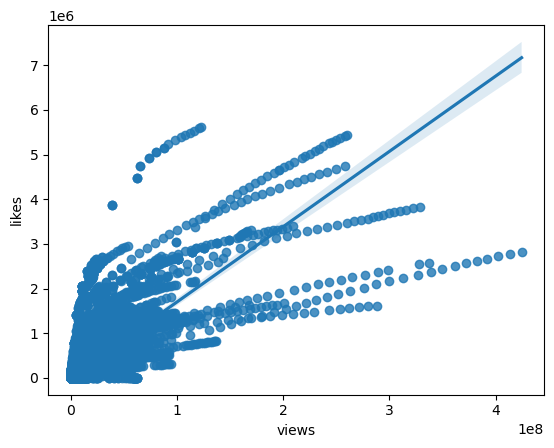

In [278]:
#sns.scatterplot(data=full_df, x=full_df['views'], y=full_df['likes'], color='red')
sns.regplot(data=full_df, x='views', y='likes')

There is a positive linear relationship between likes and views

<Axes: >

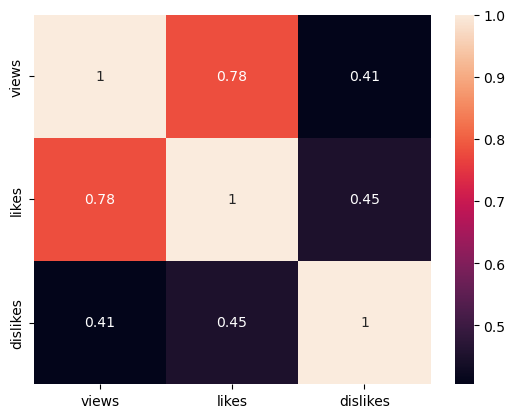

In [280]:
sns.heatmap(full_df[['views', 'likes', 'dislikes']].corr(), annot=True)

### Trending Videos

Here we are finding the chanel which has the most number of trending videos

In [282]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,likes_rate,dislikes_rate,comment_count_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,4.589104,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00+00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,12.594873,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,4.575843,4.575843,0.167292,0.256342
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,...,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,6.309630,6.309630,0.094903,0.835851
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14+00:00,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,...,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music,4.874563,4.874563,0.062887,0.253752


In [302]:
cdf = full_df['channel_title'].value_counts().reset_index()

In [303]:
cdf.rename(columns={'index':'channel_title','channel_title':'total_videos'})

,channel_title,total_videos
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Daas,1
37820,YT Industries,1
37821,BTLV Le mÃ©dia complÃ©mentaire,1
37822,Quem Sabia ?,1


In [306]:
cdf.columns

Index(['index', 'channel_title'], dtype='object')

###### alternate method by using groupby function

In [307]:
cdf_new = full_df.groupby(['channel_title']).size().sort_values(ascending=False).reset_index()

In [310]:
cdf_new

,channel_title,0
0,The Late Show with Stephen Colbert,710
1,WWE,643
2,Late Night with Seth Meyers,592
3,TheEllenShow,555
4,Jimmy Kimmel Live,528
...,...,...
37819,Kd Malts,1
37820,Zedan TV,1
37821,Kc Kelly - Rocketprenuer,1
37822,Kbaby,1


In [313]:
cdf_new=cdf_new.rename(columns={0:'total_videos'})

In [317]:
#using plotly express
fig = px.bar(cdf_new[0:15], x= 'channel_title', y = 'total_videos')
fig.update_traces(marker_color="crimson")
fig.update_layout(
    title="Top 15 Trending Channels",
    xaxis_title="Channel",
    yaxis_title="Total videos",
    plot_bgcolor= 'white')
fig.show()

Things to do:
1. How long usually a video can trend in different countries?

2. Videos from which category has longer trend?

3. Most common words(Trending words) in video titles

4. which category has highest ratio of Likes-Dislikes and Views-Comments

In [320]:
full_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,likes_rate,dislikes_rate,comment_count_rate
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Music,4.589104,4.589104,0.253051,0.733639
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00+00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,...,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy,12.594873,12.594873,0.166363,1.284185
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,...,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,4.575843,4.575843,0.167292,0.256342
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,...,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,6.309630,6.309630,0.094903,0.835851
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14+00:00,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,...,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Music,4.874563,4.874563,0.062887,0.253752


### Trending words in Video titles

In [321]:
title_list = ' '.join(full_df['title'])

In [322]:
type(title_list)

str

In [323]:
title_wordcloud = WordCloud(stopwords=stopwords).generate(title_list)

(-0.5, 399.5, 199.5, -0.5)

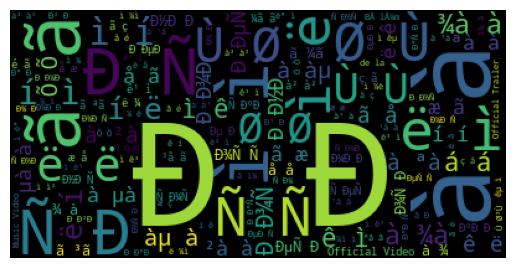

In [324]:
plt.imshow(title_wordcloud)
plt.axis('off')

In [340]:
title_words = list(full_df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('-', 101854),
 ('|', 97756),
 ('2018', 24485),
 ('de', 20441),
 ('The', 19458),
 ('&', 13432),
 ('a', 10013),
 ('/', 9758),
 ('the', 9276),
 ('in', 8480),
 ('Episode', 8319),
 ('A', 8238),
 ('2017', 7885),
 ('Ð', 7515),
 ('of', 7431),
 ('DE', 7339),
 ('2', 7166),
 ('Video)', 7128),
 ('!', 7099),
 ('\x8bã', 6893),
 ('to', 6840),
 (':', 6755),
 ('and', 6405),
 ('la', 6377),
 ('(Official', 6351)]

(-0.5, 1199.5, 499.5, -0.5)

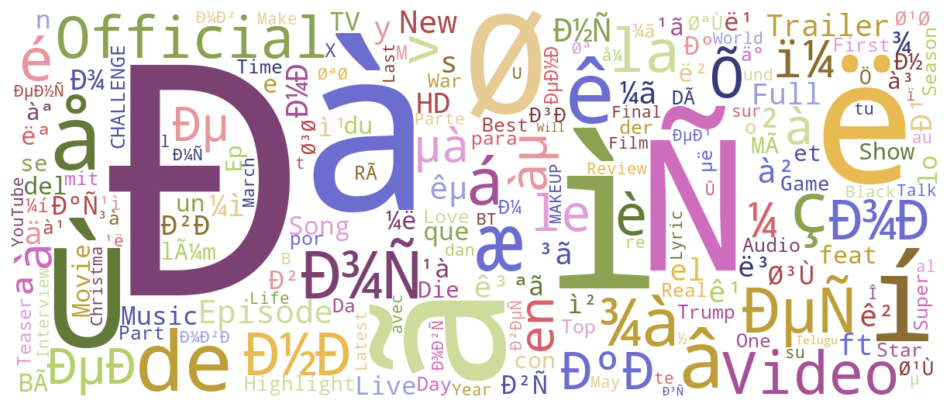

In [346]:
wc = WordCloud(width=1200, height=500,stopwords=stopwords, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")